In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Data processing and analysis libraries
import numpy as np
import pandas as pd
from collections import Counter

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
import plotly.graph_objects as go

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/iot/E-Commerce_Data.csv', encoding="ISO-8859-1")


In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# Count total NaN values per column
print(df.isna().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
# Numerical and Categorial Dataframes to use later
Categorial_df = df.select_dtypes(include='object')
Numerical_df = df.select_dtypes(include='number')

print('Categoricals:', list(Categorial_df))
print('----------------------------------------------------------------------------------')
print('Numericals:',list(Numerical_df))

Categoricals: ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
----------------------------------------------------------------------------------
Numericals: ['Quantity', 'UnitPrice', 'CustomerID']


**Exploratory Data Analysis (EDA)**



In [10]:
# Summary statistics of Numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Outliers in the Quantity column include very large values (e.g., 80995) and large negative values (e.g., -80995).

In the UnitPrice column, negative values (e.g., -11062.06) and very large values (e.g., 38970.0) are considered outliers.

For more precise identification, use the IQR method and examine data points outside the calculated ranges. Additionally, contextual analysis of the data (e.g., whether negative values are due to returns or errors) is essential.

In [11]:
# Summary statistics of Object features

df.describe(include= 'object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


The dataset includes 541,909 unique invoices, with invoice 573585 being the most frequent (1,114 occurrences), suggesting batch or recurring orders.

It contains 4,070 unique product codes, with 85123A appearing most often (2,313 times), indicating popular products.

There are 4,223 unique product descriptions, with "WHITE HANGING HEART T-LIGHT HOLDER" as the top seller (2,369 times).

Invoice dates total 23,260, with 31/10/2011 at 14:41 being the busiest.The high volume of transactions at that specific time (1,114 transactions).

Transactions span 38 countries, predominantly in the UK (495,478), marking it as the primary market.

In [12]:
#Calculating the TotalPrice per order (UnitPrice and Quantity)
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


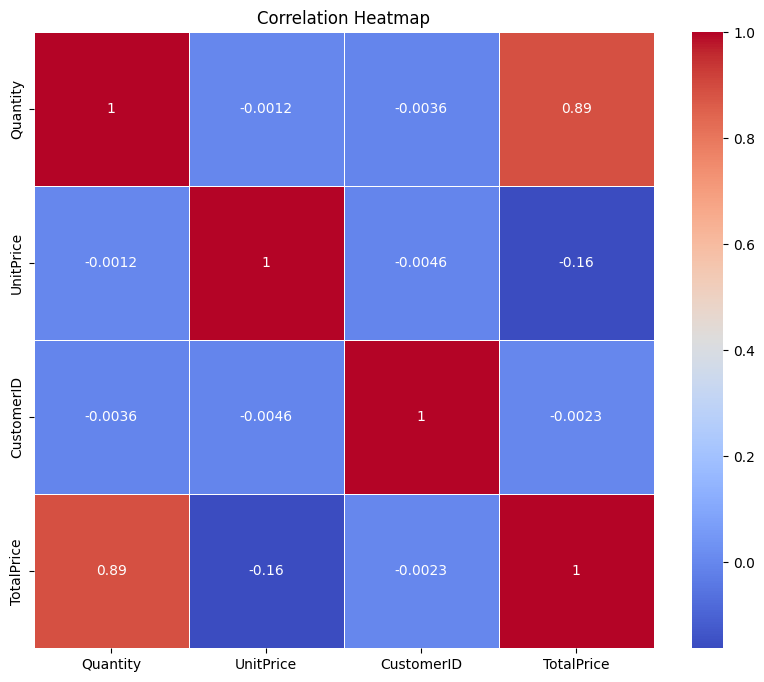

In [13]:
Numerical_df = df[['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice']]
# Compute the correlation matrix
corr_matrix = Numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

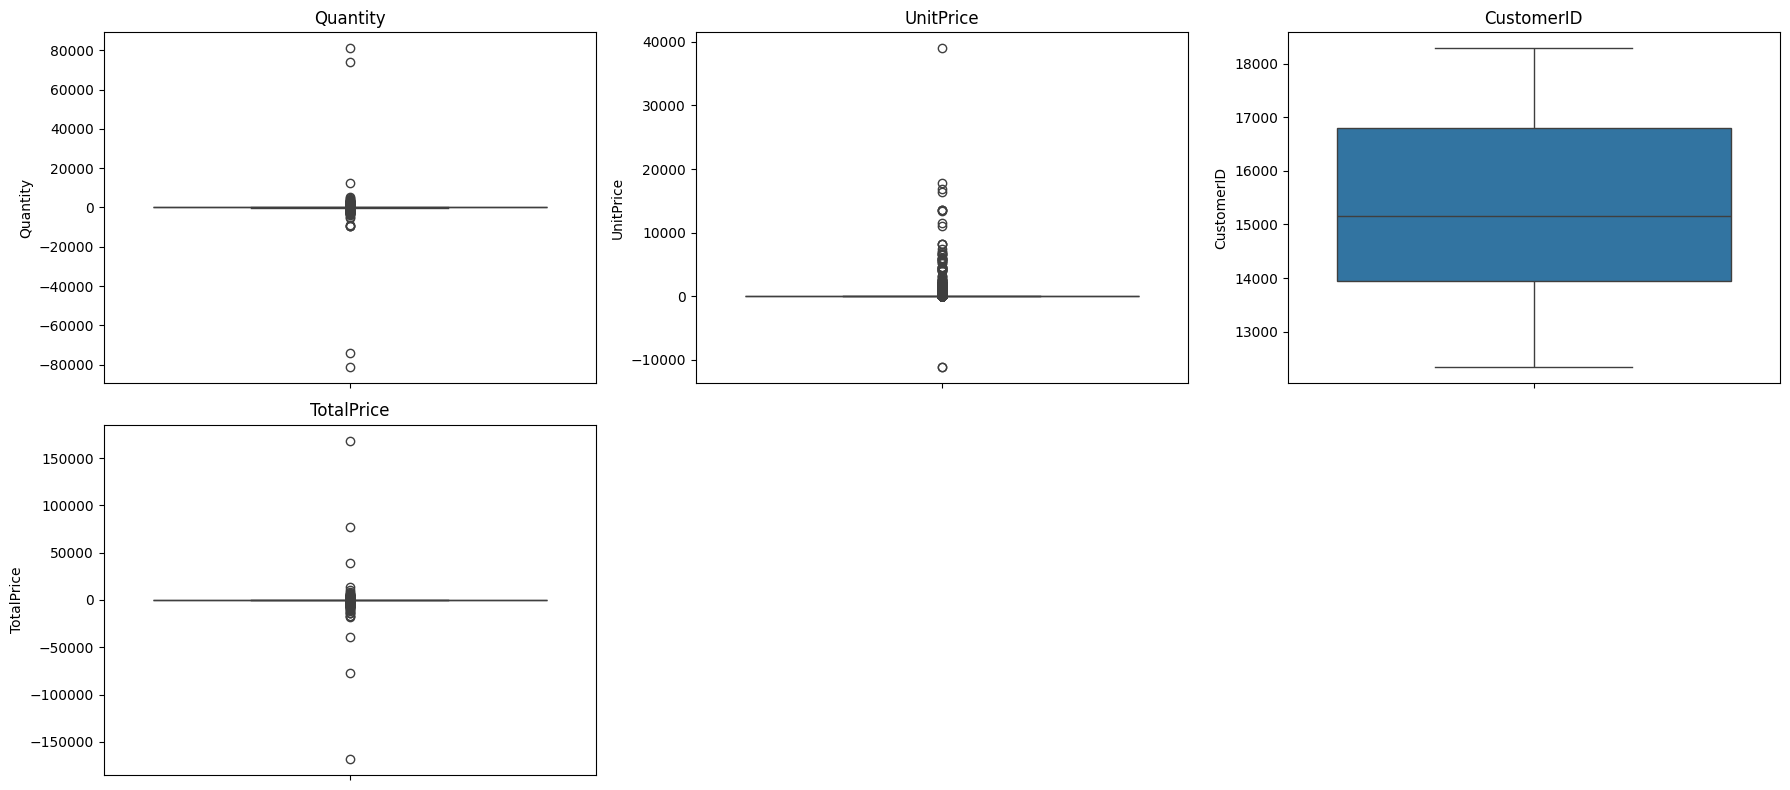

In [14]:
plt.figure(figsize=(18, 8))
for i, col in enumerate(Numerical_df, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], whis=1.5)
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
#Find out the number of orders for each country separately.
country_mask = df.groupby(['Country', 'InvoiceNo']).size().reset_index(name='order_count')
country_order = country_mask.groupby('Country').agg(order_count=('order_count', 'count')).sort_values(by='order_count', ascending=False)
print(country_mask)

           Country InvoiceNo  order_count
0        Australia    536389           14
1        Australia    537676            8
2        Australia    539419           10
3        Australia    540267           46
4        Australia    540280            2
...            ...       ...          ...
25895  Unspecified    563947            7
25896  Unspecified    564051           16
25897  Unspecified    565303           66
25898  Unspecified    576646           19
25899  Unspecified    578539           34

[25900 rows x 3 columns]


In [16]:
print(country_order)

                      order_count
Country                          
United Kingdom              23494
Germany                       603
France                        461
EIRE                          360
Belgium                       119
Spain                         105
Netherlands                   101
Switzerland                    74
Portugal                       71
Australia                      69
Italy                          55
Finland                        48
Sweden                         46
Norway                         40
Channel Islands                33
Japan                          28
Poland                         24
Denmark                        21
Cyprus                         20
Austria                        19
Hong Kong                      15
Unspecified                    13
Malta                          10
Singapore                      10
Israel                          9
Iceland                         7
USA                             7
Greece        

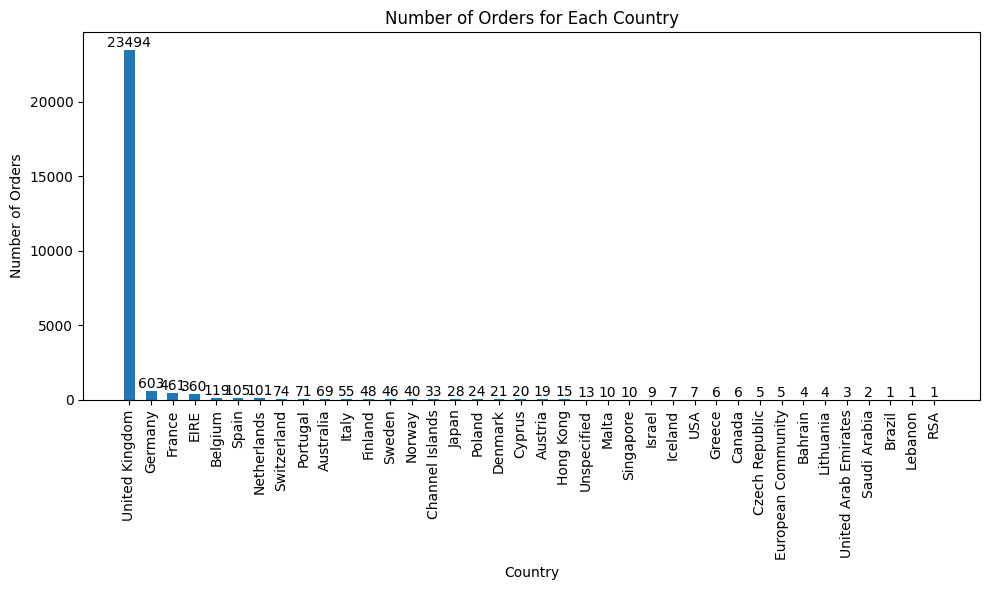

In [17]:
plt.figure(figsize=(10, 6))

bar_width = 0.5

# drawing the plot
plt.bar(np.arange(len(country_order.index)), country_order['order_count'], width=bar_width)

for i, value in enumerate(country_order['order_count']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

# title and label
plt.title('Number of Orders for Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')

plt.xticks(np.arange(len(country_order.index)), country_order.index, rotation=90)

plt.tight_layout()
plt.show()

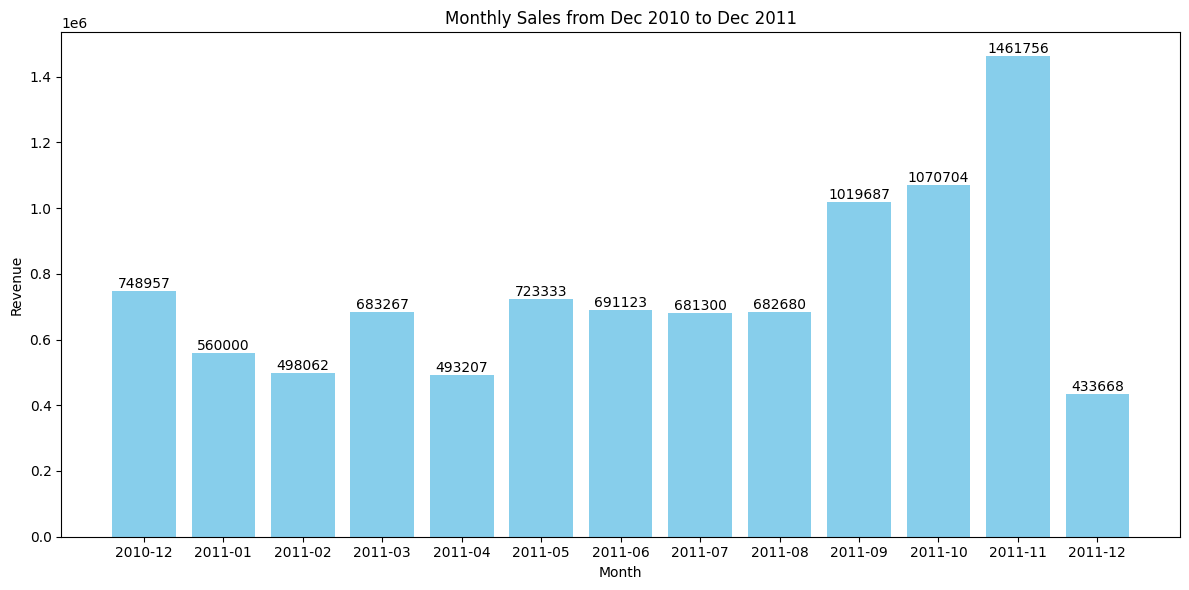

In [18]:
#Find out the total sales per month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
x_labels = monthly_sales.index.strftime('%Y-%m')




plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, monthly_sales, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Monthly Sales from Dec 2010 to Dec 2011')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
#Top 10 products
product_grouped = df.groupby('Description')
quantity_product = product_grouped.agg({'Quantity':'sum'})
quantity_product_top10 = quantity_product.nlargest(10, 'Quantity')
print(quantity_product_top10)

                                    Quantity
Description                                 
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53847
JUMBO BAG RED RETROSPOT                47363
ASSORTED COLOUR BIRD ORNAMENT          36381
POPCORN HOLDER                         36334
PACK OF 72 RETROSPOT CAKE CASES        36039
WHITE HANGING HEART T-LIGHT HOLDER     35317
RABBIT NIGHT LIGHT                     30680
MINI PAINT SET VINTAGE                 26437
PACK OF 12 LONDON TISSUES              26315
PACK OF 60 PINK PAISLEY CAKE CASES     24753


In [20]:
topsale_revenue = product_grouped.agg({'Quantity':'sum', 'TotalPrice':'sum'})
topsale_revenue_top10 = topsale_revenue.nlargest(10, 'TotalPrice')
print(topsale_revenue_top10)


                                    Quantity  TotalPrice
Description                                             
DOTCOM POSTAGE                           707   206245.48
REGENCY CAKESTAND 3 TIER               13033   164762.19
WHITE HANGING HEART T-LIGHT HOLDER     35317    99668.47
PARTY BUNTING                          18022    98302.98
JUMBO BAG RED RETROSPOT                47363    92356.03
RABBIT NIGHT LIGHT                     30680    66756.59
POSTAGE                                 3003    66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         18902    63791.94
ASSORTED COLOUR BIRD ORNAMENT          36381    58959.73
CHILLI LIGHTS                          10229    53768.06


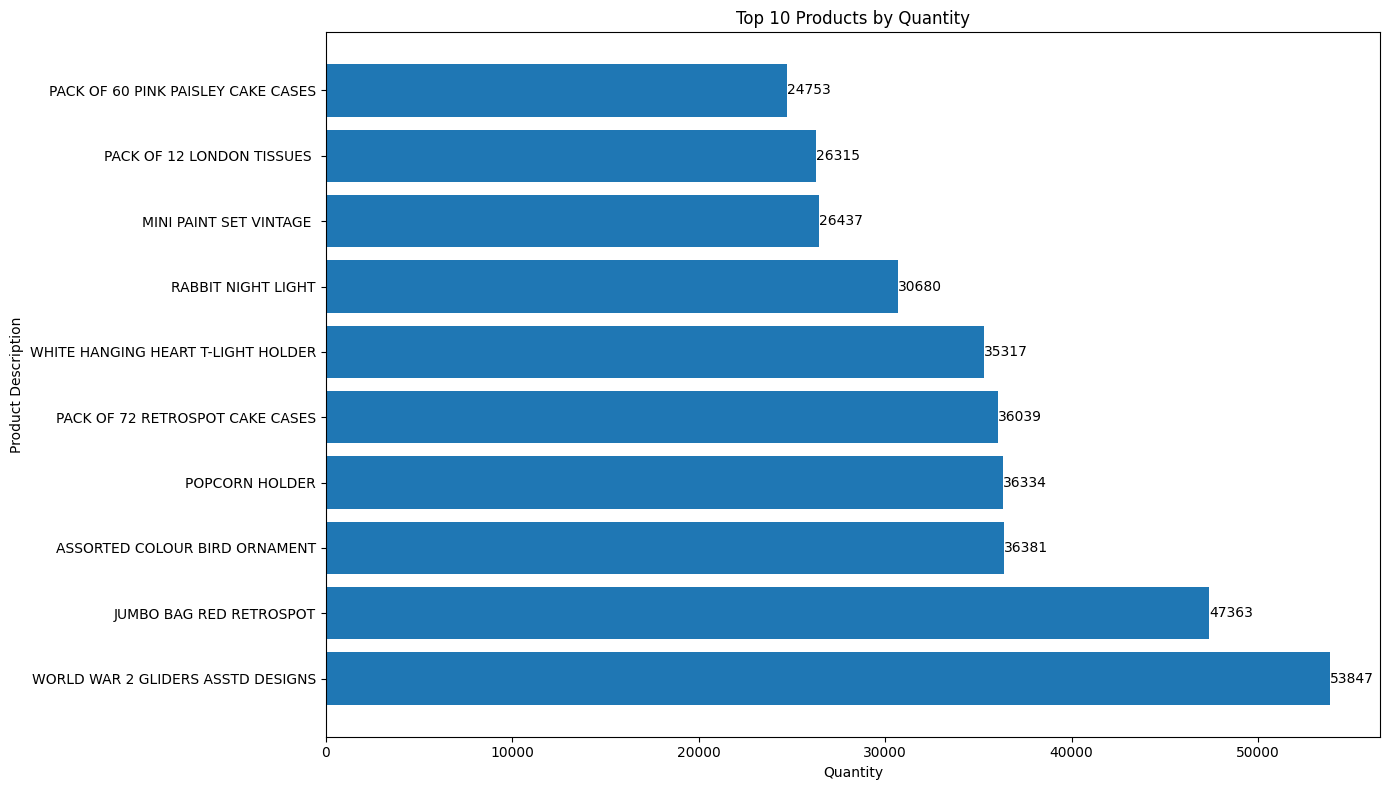

In [21]:
plt.figure(figsize=(14, 8))
plt.barh(quantity_product_top10.index, quantity_product_top10['Quantity'])

plt.title('Top 10 Products by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product Description')

for i, value in enumerate(quantity_product_top10['Quantity']):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

In [22]:
print('Number of Unique CustomerID: ',df['CustomerID'].nunique())


Number of Unique CustomerID:  4372


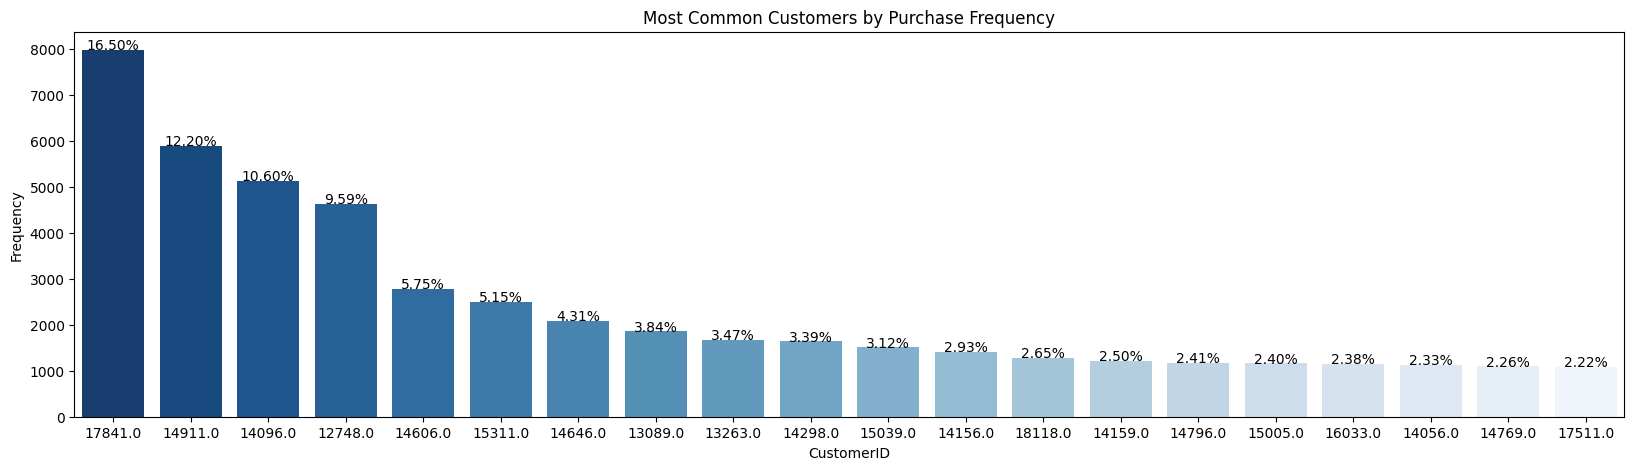

In [23]:
# Customer transaction frequency
customer_frequency = df['CustomerID'].value_counts().nlargest(20)

plt.figure(figsize=(20, 5))
ax = sns.barplot(x=customer_frequency.index.astype(str), y=customer_frequency.values, palette='Blues_r')

# Add only percentage labels on the bars
for i, v in enumerate(customer_frequency.values):
    ax.text(i, v + 10, f'{v / customer_frequency.sum() * 100:.2f}%', ha='center', fontsize=10)

plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.title('Most Common Customers by Purchase Frequency')
#plt.xticks(rotation=45)
plt.show()

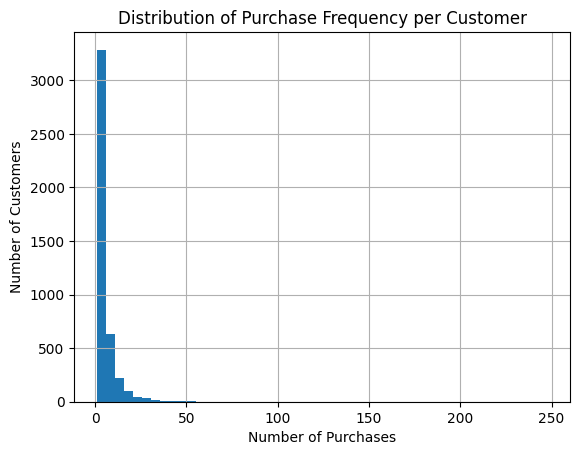

In [24]:
# Customer Purchase Behavior (Histogram of Purchase Frequency)
purchase_freq = df.groupby('CustomerID')['InvoiceNo'].nunique()
purchase_freq.hist(bins=50)
plt.title('Distribution of Purchase Frequency per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

**E-commerce Data Cleaning and Preprocessing**



In [25]:
total_nulls = df.isnull().sum()
per_nulls = (total_nulls/len(df))*100
print(f"No.of nulls in each column are:\n{per_nulls}")

No.of nulls in each column are:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
TotalPrice      0.000000
Month           0.000000
dtype: float64


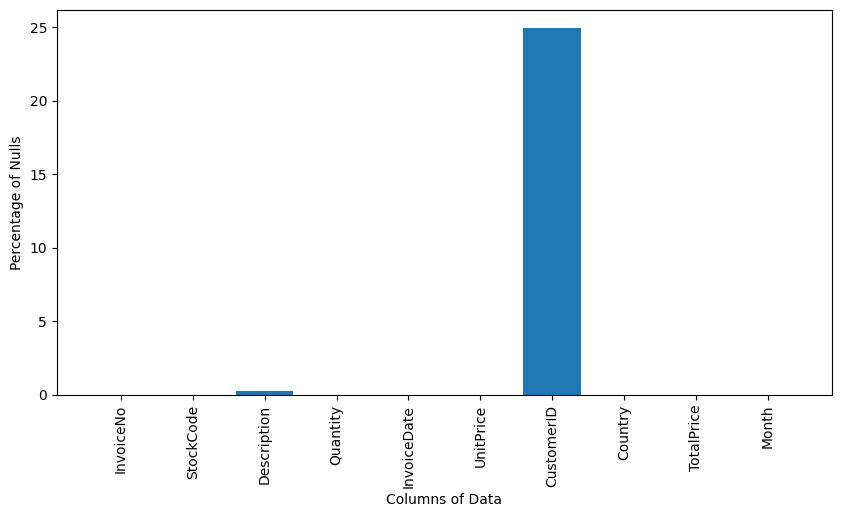

In [26]:
plt.figure(figsize=(10,5))
plt.bar(per_nulls.index, per_nulls)
plt.xticks(rotation=90)
plt.xlabel("Columns of Data")
plt.ylabel("Percentage of Nulls")
plt.show()

In [27]:
print(f"Total data before dropping any data is : {len(df)}")
df = df.dropna(subset=['CustomerID'],axis=0)
print(f"Total data after dropping any data is : {len(df)}")

Total data before dropping any data is : 541909
Total data after dropping any data is : 406829


In [28]:
# First check if 'Description' column exists
if 'Description' in df.columns:
    df['Description'] = df['Description'].fillna('Unknown')
    print(f"Number of null values in Description: {df['Description'].isnull().sum()}")
else:
    print("'Description' column not found in the dataset")

Number of null values in Description: 0


**Duplicate transactions based on InvoiceNo, StockCode, and Quantity, and create a bar plot showing the number of duplicates found versus unique transaction**

In [29]:
duplicates = df[df.duplicated(subset=["InvoiceNo", "StockCode", "Quantity"], keep=False)]
print(f"Total no. of duplicated values: {len(duplicates)}")

print(f"Total duplicated Values = {(len(duplicates)/len(df))*100:.2f}%")

Total no. of duplicated values: 10159
Total duplicated Values = 2.50%


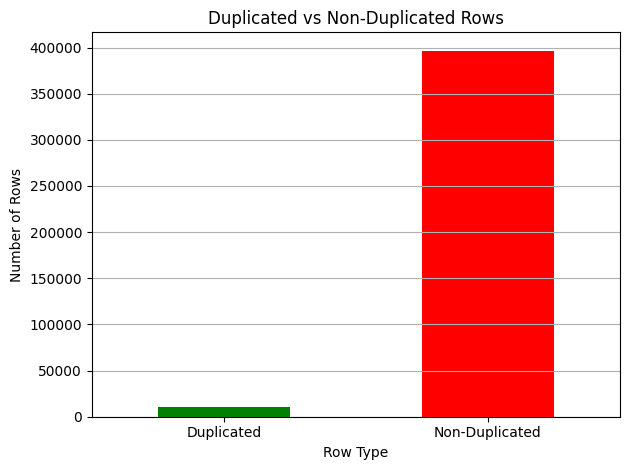

In [30]:
dup_counts = pd.Series({
    'Duplicated': len(duplicates),
    'Non-Duplicated': len(df) - len(duplicates)
})
dup_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Duplicated vs Non-Duplicated Rows')
plt.ylabel('Number of Rows')
plt.xlabel('Row Type')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
print(f"Data before dropping duplicates: {len(df)}")
df = df.drop_duplicates(subset=["InvoiceNo", "StockCode", "Quantity"], keep="first")
print(f"Data after dropping duplicates:  {len(df)}")

Data before dropping duplicates: 406829
Data after dropping duplicates:  401548


 Filter out cancellation transactions (where InvoiceNo starts with ‘C’), and visualize the proportion of cancellations versus non-cancellations in a pie char

Total number of cancelled orders: 8841


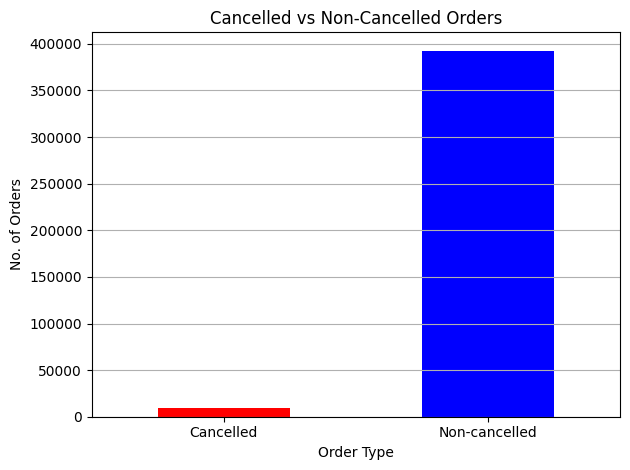

In [32]:
cancel = df['InvoiceNo'].str.startswith('C')
print(f"Total number of cancelled orders: {cancel.sum()}")

cancel_order = pd.Series({
    'Cancelled': cancel.sum(),
    'Non-cancelled': len(df) - cancel.sum()
})

cancel_order.plot(kind='bar', color=['red', 'blue'])
plt.title("Cancelled vs Non-Cancelled Orders")
plt.xlabel("Order Type")
plt.ylabel("No. of Orders")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Convert InvoiceDate to a datetime format and extract the Month as a new column**

In [33]:
from datetime import datetime
data_month = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['Month'] = data_month.dt.month
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,12


**Standardize Description by converting it to uppercase and removing extra spaces**

In [34]:
df['Description'] = df['Description'].str.strip().str.capitalize()
df['Description'].head(10)

,Description
0,White hanging heart t-light holder
1,White metal lantern
2,Cream cupid hearts coat hanger
3,Knitted union flag hot water bottle
4,Red woolly hottie white heart.
5,Set 7 babushka nesting boxes
6,Glass star frosted t-light holder
7,Hand warmer union jack
8,Hand warmer red polka dot
9,Assorted colour bird ornament


**convert the Country column to a categorical data type, and display a table comparing memory usage before and after the conversion**

In [35]:
#(نوع اولیه احتمالاً object هست که حافظه زیادی مصرف می‌کنه چون رشته‌ها به‌صورت مجزا ذخیره می‌شن.)
#این کار مفید است وقتی تعداد مقادیر یکتا در ستون کم باشد (مثلاً نام کشورها).

print(f"Memory usage befor: {df['Country'].memory_usage()}")
df['Country'] = df['Country'].astype('category')
df['Country'].sample(10)      # used to take 10 random samples from the column

Memory usage befor: 6424768


,Country
477055,United Kingdom
499283,United Kingdom
246016,United Kingdom
161589,United Kingdom
59597,United Kingdom
144655,United Kingdom
148894,United Kingdom
231737,United Kingdom
494312,United Kingdom
393238,United Kingdom


In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,White hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,White metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,Cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,Knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,Red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


 Create bin TotalPrice into three fixed categories (‘Low’ ≤50, ‘Medium’ 50-200, ‘High’ >200), and create a count plot to show the number of transactions in each bin

No. of low data(<= 50) are : 374655
No. of medium data(>50 and <=200) are : 22857
No. of high data(>200) are : 4036


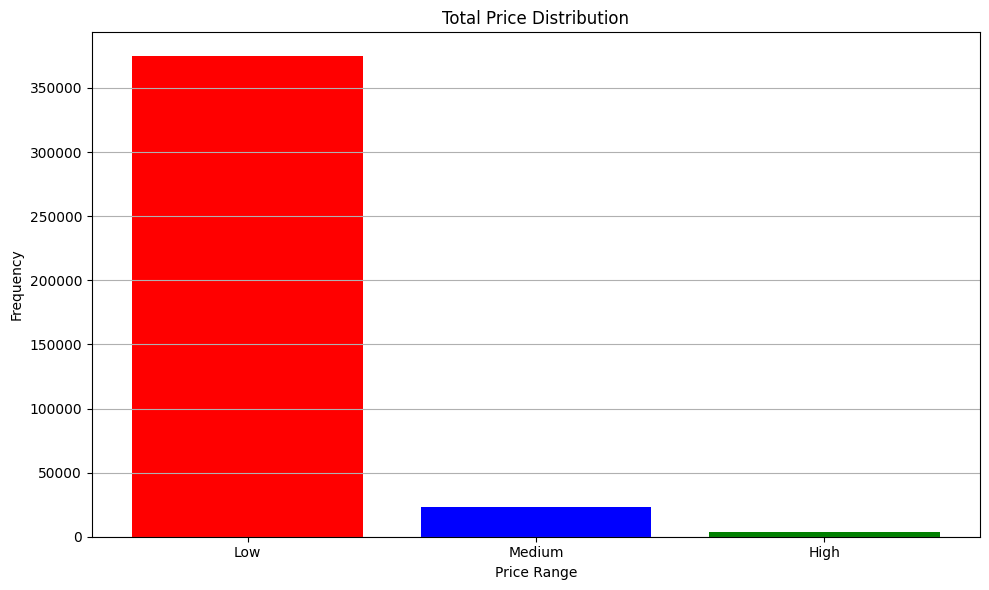

In [37]:
low_data = df[df['TotalPrice']<= 50]
print(f"No. of low data(<= 50) are : {len(low_data)}")
medium_data = df[(df['TotalPrice']>50) & (df['TotalPrice']<= 200)]
print(f"No. of medium data(>50 and <=200) are : {len(medium_data)}")
high_data = df[df['TotalPrice']>200]
print(f"No. of high data(>200) are : {len(high_data)}")

plt.figure(figsize=(10, 6))
plt.bar(['Low','Medium','High'], [len(low_data),len(medium_data),len(high_data)],color=['red','blue','green'])
plt.title("Total Price Distribution")
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Detect outliers in Quantity using the IQR method, and visualize the distribution of Quantity with box plots before and after outlier removal**

Data before dropping any data is : 401548


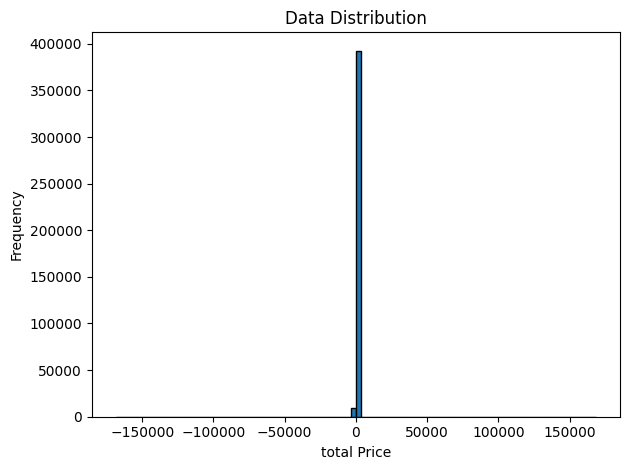

In [38]:
print(f"Data before dropping any data is : {len(df)}")
plt.hist(df['TotalPrice'], bins=100, edgecolor='black')
plt.title("Data Distribution")
plt.xlabel("total Price")
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [39]:
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1-1.5 * iqr
upper_bound = q3+1.5 * iqr
print(f"Lower Bound: {lower_bound} while minimum value is {df['Quantity'].min()}")
print(f"Upper Bound: {upper_bound} while maximum value is {df['Quantity'].max()}")
data_outlier = df[(df['Quantity'] > lower_bound) | (df['Quantity'] < upper_bound)]
print(f"Total number of non-outliers {len(data_outlier)} and outliers is {len(df)-len(data_outlier)} while total data is {len(df)}")

Lower Bound: -13.0 while minimum value is -80995
Upper Bound: 27.0 while maximum value is 80995
Total number of non-outliers 401548 and outliers is 0 while total data is 401548


Data after dropping any data is : 401548


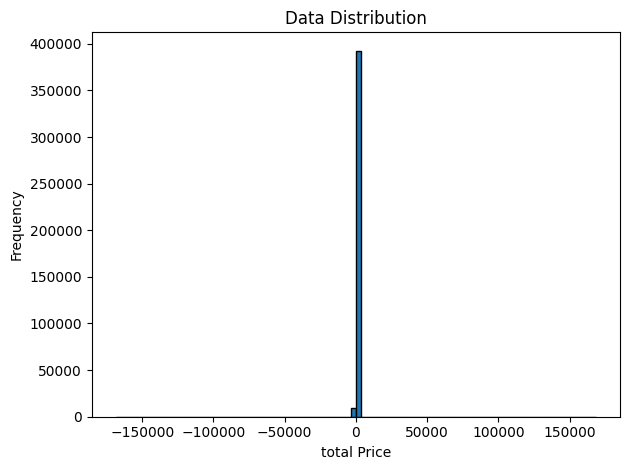

In [40]:
print(f"Data after dropping any data is : {len(data_outlier)}")
plt.hist(data_outlier['TotalPrice'], bins=100, edgecolor='black')
plt.title("Data Distribution")
plt.xlabel("total Price")

plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Replace negative UnitPrice values with zero**

In [41]:
df['UnitPrice'].value_counts()


,count
UnitPrice,
1.25,45813
1.65,36954
2.95,26796
0.85,26082
0.42,21777
...,...
1.86,1
3.30,1
13.35,1


In [42]:
print(f"Number of Unit Prices less than 0: {sum(df['UnitPrice'] < 0)}")
df.loc[df['UnitPrice']<0,'UnitPrice'] = 0
print(f"Number of Unit Prices less than 0: {sum(df['UnitPrice'] < 0)}")

Number of Unit Prices less than 0: 0
Number of Unit Prices less than 0: 0
